# Flight Status Predictor

**What problem are we trying to solve?**

The goal of this project is to develop and deploy an ML model in which an end user can specify a set of features describing a commercial flight of interest and receive a categorical (yes or no) output indicating if that flight will be delayed more than fifteen minutes or not. 

**Answer these questions about the data:**

- What variables contribute to a flight being delayed or not?
- Are there any variables that might hinder the analysis?
- Is there imbalance or bias in the dataset that could make the data lean more towards one way than another? 

---

# Data Preprocessing (Data Cleaning and Preparation)

<span style="color:red">**NOTE**</span>: This step was mostly taken care of, but wanted to still view the data and make any necessary adjustments

**Cleaning and Formatting**

In [2]:
# Import libraries 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# Store CSV file in variable 
flights = r'..\data\Flight_On_Time_Data.csv'
# Read CSV file in pandas dataframe 
df = pd.read_csv(flights)

In [6]:
# Set options to view all columns instead of truncating columns
pd.set_option('display.max_columns', None)

# Print dataframe to confirm successful loading
df

,Carrier_Name,Year,Quarter,Month,Month_Day,Week_Day,Flight_Date,Airline_DOT_ID,Tail_Number,Flight_Number,Origin_Airport_ID,Origin_City_Market_ID,Origin_IATA_Code,Origin_City_State,Destination_Airport_ID,Destination_City_Market_ID,Destination_IATA_Code,Destination_City_State,Dep_Time_Block_Group,Scheduled_Departure_Time,Actual_Dep_Time,Dep_Time_Offset,Dep_Delay_Minutes,Dep_Delay_At_Least_15_Minutes,Scheduled_Arrival_Time,Arr_Time_Block_Group,Actual_Arr_Time,Arr_Time_Offset,Arr_Delay_Minutes,Arr_Delay_At_Least_15_Minutes,Flight_Cancelled,Flight_Diverted,Scheduled_Gate_to_Gate_Time,Actual_Gate_to_Gate_Time,Time_Airborne,Number_of_Flights,Distance_Miles,Distance_Group,Carrier_Delay,Weather_Delay,National_Aviation_System_Delay,Security_Delay,Late_Aircraft_Delay
0,United Air Lines Inc.,2023,2,Apr,26,Wednesday,2023-04-26,19977,N851UA,1788,11298,30194,DFW,"Dallas/Fort Worth, TX",11618,31703,EWR,"Newark, NJ",Evening,1926,1933,7,7,0,2359,Night,12,13,13,0,0,0,213,219,162,1,1372,6,NaN,NaN,NaN,NaN,NaN
1,United Air Lines Inc.,2023,2,Apr,26,Wednesday,2023-04-26,19977,N37530,1787,11292,30325,DEN,"Denver, CO",13871,33316,OMA,"Omaha, NE",Evening,2051,2130,39,39,1,2316,Night,3,47,47,1,0,0,85,93,65,1,472,2,39.0,0.0,8.0,0.0,0.0
2,United Air Lines Inc.,2023,2,Apr,26,Wednesday,2023-04-26,19977,N78509,1786,12892,32575,LAX,"Los Angeles, CA",11042,30647,CLE,"Cleveland, OH",Night,2328,2319,-9,0,0,701,Early Morning,650,-11,0,0,0,0,273,271,249,1,2052,9,NaN,NaN,NaN,NaN,NaN
3,United Air Lines Inc.,2023,2,Apr,26,Wednesday,2023-04-26,19977,N47280,1785,10721,30721,BOS,"Boston, MA",12264,30852,IAD,"Washington, DC",Early Morning,600,557,-3,0,0,735,Early Morning,724,-11,0,0,0,0,95,87,69,1,413,2,NaN,NaN,NaN,NaN,NaN
4,United Air Lines Inc.,2023,2,Apr,26,Wednesday,2023-04-26,19977,N826UA,1784,14747,30559,SEA,"Seattle, WA",11292,30325,DEN,"Denver, CO",Morning,1116,1113,-3,0,0,1459,Early Afternoon,1453,-6,0,0,0,0,163,160,129,1,1024,5,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6777973,Republic Airline,2024,1,Mar,29,Friday,2024-03-29,20452,N236JQ,5646,10721,30721,BOS,"Boston, MA",11278,30852,DCA,"Washington, DC",Early Afternoon,1315,1312,-3,0,0,1507,Afternoon,1452,-15,0,0,0,0,112,100,75,1,399,2,NaN,NaN,NaN,NaN,NaN
6777974,Republic Airline,2024,1,Mar,29,Friday,2024-03-29,20452,N236JQ,5646,11278,30852,DCA,"Washington, DC",10721,30721,BOS,"Boston, MA",Afternoon,1620,1616,-4,0,0,1802,Evening,1743,-19,0,0,0,0,102,87,67,1,399,2,NaN,NaN,NaN,NaN,NaN
6777975,Republic Airline,2024,1,Mar,29,Friday,2024-03-29,20452,N212JQ,5647,10721,30721,BOS,"Boston, MA",11193,33105,CVG,"Cincinnati, OH",Early Afternoon,1425,1418,-7,0,0,1659,Afternoon,1634,-25,0,0,0,0,154,136,110,1,752,4,NaN,NaN,NaN,NaN,NaN
6777976,Republic Airline,2024,1,Mar,29,Friday,2024-03-29,20452,N212JQ,5647,11193,33105,CVG,"Cincinnati, OH",10721,30721,BOS,"Boston, MA",Afternoon,1751,1743,-8,0,0,1958,Evening,1951,-7,0,0,0,0,127,128,107,1,752,4,NaN,NaN,NaN,NaN,NaN


In [8]:
df.columns

Index(['Carrier_Name', 'Year', 'Quarter', 'Month', 'Month_Day', 'Week_Day',
       'Flight_Date', 'Airline_DOT_ID', 'Tail_Number', 'Flight_Number',
       'Origin_Airport_ID', 'Origin_City_Market_ID', 'Origin_IATA_Code',
       'Origin_City_State', 'Destination_Airport_ID',
       'Destination_City_Market_ID', 'Destination_IATA_Code',
       'Destination_City_State', 'Dep_Time_Block_Group',
       'Scheduled_Departure_Time', 'Actual_Dep_Time', 'Dep_Time_Offset',
       'Dep_Delay_Minutes', 'Dep_Delay_At_Least_15_Minutes',
       'Scheduled_Arrival_Time', 'Arr_Time_Block_Group', 'Actual_Arr_Time',
       'Arr_Time_Offset', 'Arr_Delay_Minutes', 'Arr_Delay_At_Least_15_Minutes',
       'Flight_Cancelled', 'Flight_Diverted', 'Scheduled_Gate_to_Gate_Time',
       'Actual_Gate_to_Gate_Time', 'Time_Airborne', 'Number_of_Flights',
       'Distance_Miles', 'Distance_Group', 'Carrier_Delay', 'Weather_Delay',
       'National_Aviation_System_Delay', 'Security_Delay',
       'Late_Aircraft_Delay'],

**Check for correct dtypes**

In [10]:
# Get summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6777978 entries, 0 to 6777977
Data columns (total 43 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   Carrier_Name                    object 
 1   Year                            int64  
 2   Quarter                         int64  
 3   Month                           object 
 4   Month_Day                       int64  
 5   Week_Day                        object 
 6   Flight_Date                     object 
 7   Airline_DOT_ID                  int64  
 8   Tail_Number                     object 
 9   Flight_Number                   int64  
 10  Origin_Airport_ID               int64  
 11  Origin_City_Market_ID           int64  
 12  Origin_IATA_Code                object 
 13  Origin_City_State               object 
 14  Destination_Airport_ID          int64  
 15  Destination_City_Market_ID      int64  
 16  Destination_IATA_Code           object 
 17  Destination_City_State     

It looks like we need to change some datatypes to the correct type (Year, Quarter, Month_Day, Flight_Number, Airline_DOT_ID, Flight_Number, Origin_Airport_ID, Origin_City_Market_ID, Destination_Airport_ID, Destination_City_Market_ID, Scheduled_Departure_Time, Actual_Dep_Time, Scheduled_Arrival_Time, and Actual_Arr_Time) - Category or Object dtype

However, we will not need some of these columns later down the line, so holding off for now on converting 

Let us move on to checking for **NULL** and **Duplicate** values 

In [12]:
# Check for missing values 
print(df.isnull().sum())

Carrier_Name                            0
Year                                    0
Quarter                                 0
Month                                   0
Month_Day                               0
Week_Day                                0
Flight_Date                             0
Airline_DOT_ID                          0
Tail_Number                             0
Flight_Number                           0
Origin_Airport_ID                       0
Origin_City_Market_ID                   0
Origin_IATA_Code                        0
Origin_City_State                       0
Destination_Airport_ID                  0
Destination_City_Market_ID              0
Destination_IATA_Code                   0
Destination_City_State                  0
Dep_Time_Block_Group                    0
Scheduled_Departure_Time                0
Actual_Dep_Time                         0
Dep_Time_Offset                         0
Dep_Delay_Minutes                       0
Dep_Delay_At_Least_15_Minutes     

In [14]:
# Check for duplicate entries
df[df.duplicated()]

,Carrier_Name,Year,Quarter,Month,Month_Day,Week_Day,Flight_Date,Airline_DOT_ID,Tail_Number,Flight_Number,Origin_Airport_ID,Origin_City_Market_ID,Origin_IATA_Code,Origin_City_State,Destination_Airport_ID,Destination_City_Market_ID,Destination_IATA_Code,Destination_City_State,Dep_Time_Block_Group,Scheduled_Departure_Time,Actual_Dep_Time,Dep_Time_Offset,Dep_Delay_Minutes,Dep_Delay_At_Least_15_Minutes,Scheduled_Arrival_Time,Arr_Time_Block_Group,Actual_Arr_Time,Arr_Time_Offset,Arr_Delay_Minutes,Arr_Delay_At_Least_15_Minutes,Flight_Cancelled,Flight_Diverted,Scheduled_Gate_to_Gate_Time,Actual_Gate_to_Gate_Time,Time_Airborne,Number_of_Flights,Distance_Miles,Distance_Group,Carrier_Delay,Weather_Delay,National_Aviation_System_Delay,Security_Delay,Late_Aircraft_Delay


- There doesn't appear to be any duplicate rows
- There are a lot of NULL values in the following columns: Carrier_Delay, Weather_Delay, National_Aviation_System_Delay, Security_Delay, and Late_Aircraft_Delay
- The data cleaning process was mostly done but these columns left NULL values. <span style="color:red">*Why?*</span>

We now want to remove some variables from the dataframe that deals with the actual delay of the flight 
- This will get rid of any biases and imbalance to our data

In [16]:
# Will have information leakage from the following columns
df.drop(['Actual_Dep_Time','Dep_Time_Offset','Dep_Delay_Minutes','Actual_Arr_Time','Arr_Time_Offset',
         'Arr_Delay_Minutes','Arr_Delay_At_Least_15_Minutes','Actual_Gate_to_Gate_Time','Carrier_Delay',
         'Weather_Delay','National_Aviation_System_Delay','Security_Delay','Late_Aircraft_Delay',
         'Actual_Gate_to_Gate_Time','Time_Airborne'], axis=1, inplace=True)

# Already have the date column so no need for this 
df.drop(['Quarter','Year','Month', 'Month_Day'], axis=1, inplace=True)

print("Columns remaining: ", df.shape[1])

Columns remaining:  25


In [18]:
df.rename(columns={'Dep_Delay_At_Least_15_Minutes':'delayed'}, inplace=True)

In [20]:
df.columns

Index(['Carrier_Name', 'Week_Day', 'Flight_Date', 'Airline_DOT_ID',
       'Tail_Number', 'Flight_Number', 'Origin_Airport_ID',
       'Origin_City_Market_ID', 'Origin_IATA_Code', 'Origin_City_State',
       'Destination_Airport_ID', 'Destination_City_Market_ID',
       'Destination_IATA_Code', 'Destination_City_State',
       'Dep_Time_Block_Group', 'Scheduled_Departure_Time', 'delayed',
       'Scheduled_Arrival_Time', 'Arr_Time_Block_Group', 'Flight_Cancelled',
       'Flight_Diverted', 'Scheduled_Gate_to_Gate_Time', 'Number_of_Flights',
       'Distance_Miles', 'Distance_Group'],
      dtype='object')

In [22]:
# View all data again after dropping so many 
df

,Carrier_Name,Week_Day,Flight_Date,Airline_DOT_ID,Tail_Number,Flight_Number,Origin_Airport_ID,Origin_City_Market_ID,Origin_IATA_Code,Origin_City_State,Destination_Airport_ID,Destination_City_Market_ID,Destination_IATA_Code,Destination_City_State,Dep_Time_Block_Group,Scheduled_Departure_Time,delayed,Scheduled_Arrival_Time,Arr_Time_Block_Group,Flight_Cancelled,Flight_Diverted,Scheduled_Gate_to_Gate_Time,Number_of_Flights,Distance_Miles,Distance_Group
0,United Air Lines Inc.,Wednesday,2023-04-26,19977,N851UA,1788,11298,30194,DFW,"Dallas/Fort Worth, TX",11618,31703,EWR,"Newark, NJ",Evening,1926,0,2359,Night,0,0,213,1,1372,6
1,United Air Lines Inc.,Wednesday,2023-04-26,19977,N37530,1787,11292,30325,DEN,"Denver, CO",13871,33316,OMA,"Omaha, NE",Evening,2051,1,2316,Night,0,0,85,1,472,2
2,United Air Lines Inc.,Wednesday,2023-04-26,19977,N78509,1786,12892,32575,LAX,"Los Angeles, CA",11042,30647,CLE,"Cleveland, OH",Night,2328,0,701,Early Morning,0,0,273,1,2052,9
3,United Air Lines Inc.,Wednesday,2023-04-26,19977,N47280,1785,10721,30721,BOS,"Boston, MA",12264,30852,IAD,"Washington, DC",Early Morning,600,0,735,Early Morning,0,0,95,1,413,2
4,United Air Lines Inc.,Wednesday,2023-04-26,19977,N826UA,1784,14747,30559,SEA,"Seattle, WA",11292,30325,DEN,"Denver, CO",Morning,1116,0,1459,Early Afternoon,0,0,163,1,1024,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6777973,Republic Airline,Friday,2024-03-29,20452,N236JQ,5646,10721,30721,BOS,"Boston, MA",11278,30852,DCA,"Washington, DC",Early Afternoon,1315,0,1507,Afternoon,0,0,112,1,399,2
6777974,Republic Airline,Friday,2024-03-29,20452,N236JQ,5646,11278,30852,DCA,"Washington, DC",10721,30721,BOS,"Boston, MA",Afternoon,1620,0,1802,Evening,0,0,102,1,399,2
6777975,Republic Airline,Friday,2024-03-29,20452,N212JQ,5647,10721,30721,BOS,"Boston, MA",11193,33105,CVG,"Cincinnati, OH",Early Afternoon,1425,0,1659,Afternoon,0,0,154,1,752,4
6777976,Republic Airline,Friday,2024-03-29,20452,N212JQ,5647,11193,33105,CVG,"Cincinnati, OH",10721,30721,BOS,"Boston, MA",Afternoon,1751,0,1958,Evening,0,0,127,1,752,4


---

# Exploratory Data Analysis (EDA)

# Basic Statistics

In [26]:
# Check summary statistics
df['Distance_Miles'].describe()

count    6.777978e+06
mean     8.350128e+02
std      5.979042e+02
min      2.100000e+01
25%      3.990000e+02
50%      6.800000e+02
75%      1.069000e+03
max      5.095000e+03
Name: Distance_Miles, dtype: float64

How many flights were delayed? 

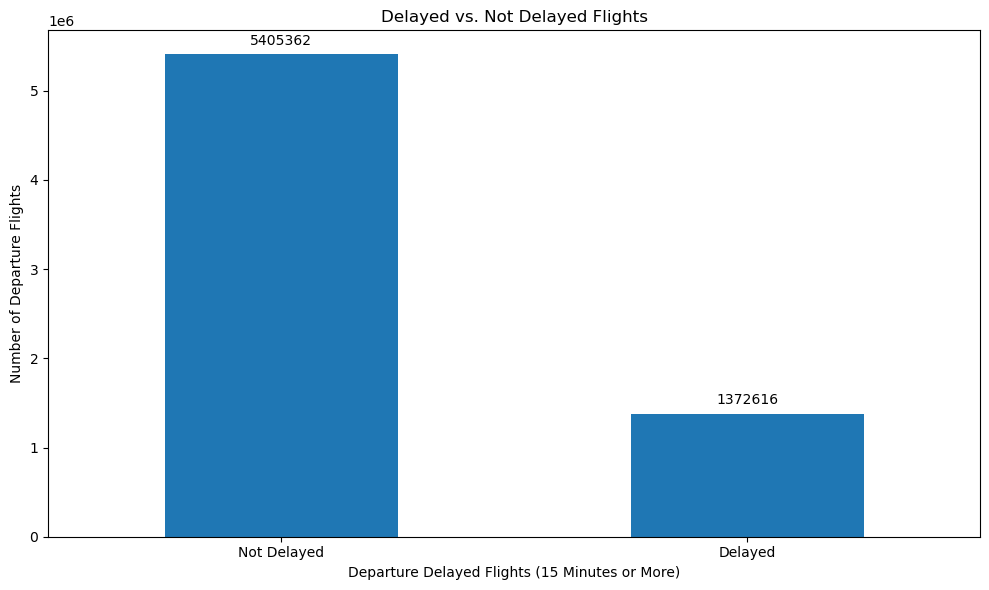

delayed
0    79.748887
1    20.251113
Name: count, dtype: float64


In [24]:
# Count the occurrences of flight delays
delayed_counts = df['delayed'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size for better readability
ax = delayed_counts.plot(kind='bar')

# Add text annotations
for p in ax.patches:
    ax.annotate(str(p.get_height()), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')
    
plt.xlabel('Departure Delayed Flights (15 Minutes or More)')
plt.ylabel('Number of Departure Flights')
plt.title('Delayed vs. Not Delayed Flights')
plt.xticks(ticks=[0, 1], rotation=0, labels=['Not Delayed', 'Delayed'], ha='center')  # Rotate x-axis labels for better visibility and define labels 
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

print((df['delayed'].value_counts()/df.shape[0]) * 100)

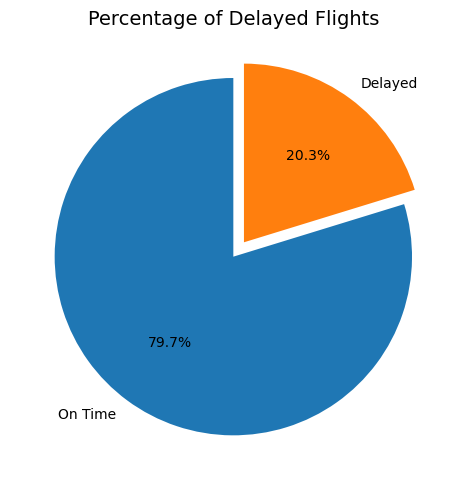

In [26]:
# Visualizing Delayed Flight Percentage

# Extract total number of on time and delayed flights
on_time, delayed = df['delayed'].value_counts()

# Data and Labels
data = [on_time, delayed]
keys = ['On Time', 'Delayed']

# Pie Chart
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(
    data,
    labels=keys,
    autopct='%1.1f%%',
    startangle=90,
    explode=[0, 0.1]
)


# Adjusting Figure Size
fig.set_size_inches(5, 5)

# Title and Layout Adjustments
plt.title('Percentage of Delayed Flights', fontsize=14)
plt.tight_layout()

# Display the plot
plt.show()

**About <span style="color:red">20%</span> of flights were delayed**

What kind of distribution do we have for airlines? 
- Does it matter which airline you choose that causes the delayed flights? 

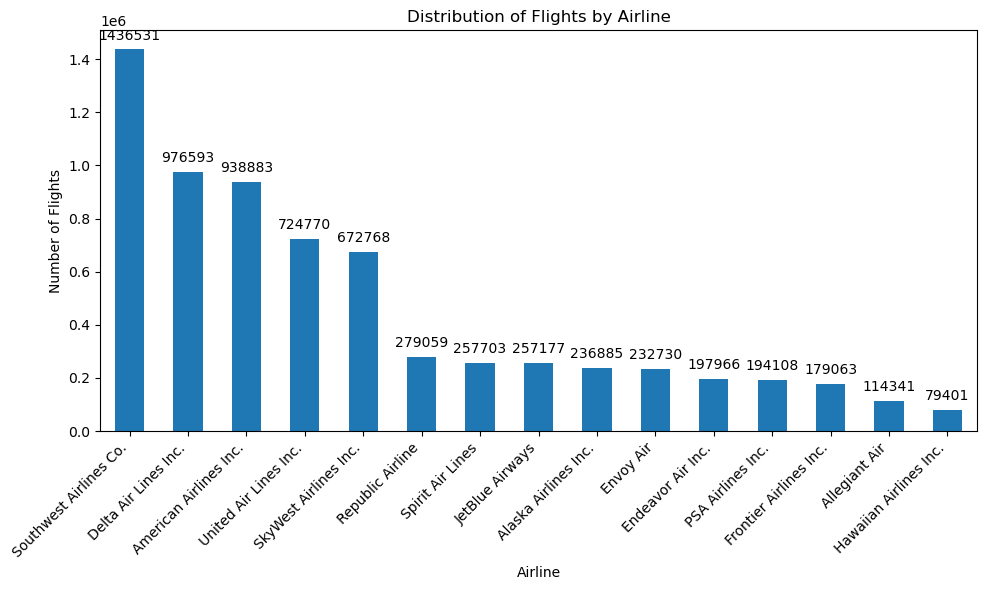

In [28]:
# Count the occurrences of each airline
airline_counts = df['Carrier_Name'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size for better readability
ax = airline_counts.plot(kind='bar')

# Add text annotations
for p in ax.patches:
    ax.annotate(str(p.get_height()), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

plt.xlabel('Airline')
plt.ylabel('Number of Flights')
plt.title('Distribution of Flights by Airline')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

<Figure size 1000x600 with 0 Axes>

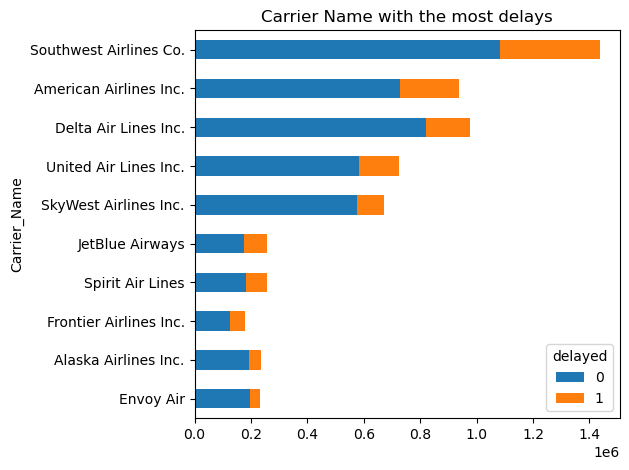

In [30]:
plt.figure(figsize=(10, 6))  # Adjust figure size for better readability
df.groupby(['Carrier_Name', 'delayed']).size().unstack().sort_values(by=1, ascending=False).head(10).plot(kind='barh', stacked=True)
plt.title('Carrier Name with the most delays')
plt.gca().invert_yaxis()
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [32]:
# Besides the chart, will add the actual values to check if bar chart outputting correctly 
df.groupby(['Carrier_Name', 'delayed']).size().unstack().sort_values(by=1, ascending=False).head(10)

delayed,0,1
Carrier_Name,,
Southwest Airlines Co.,1081894,354637
American Airlines Inc.,727695,211188
Delta Air Lines Inc.,819194,157399
United Air Lines Inc.,584375,140395
SkyWest Airlines Inc.,576529,96239
JetBlue Airways,176638,80539
Spirit Air Lines,183580,74123
Frontier Airlines Inc.,126227,52836
Alaska Airlines Inc.,194006,42879


The following airlines have the most delayed flights out of the top 10 carriers: 
- **Southwest Airlines Co.**
- **American Airlines Inc.**
- **Delta Air Lines Inc.**
- **United Air Lines Inc.**
- **SkyWest Airlines Inc.**

We will still investigate the top 10 carriers with the most delays, but keep in mind these top 5 carriers for now

Let us see which locations are responsible for the most delays in the above carriers

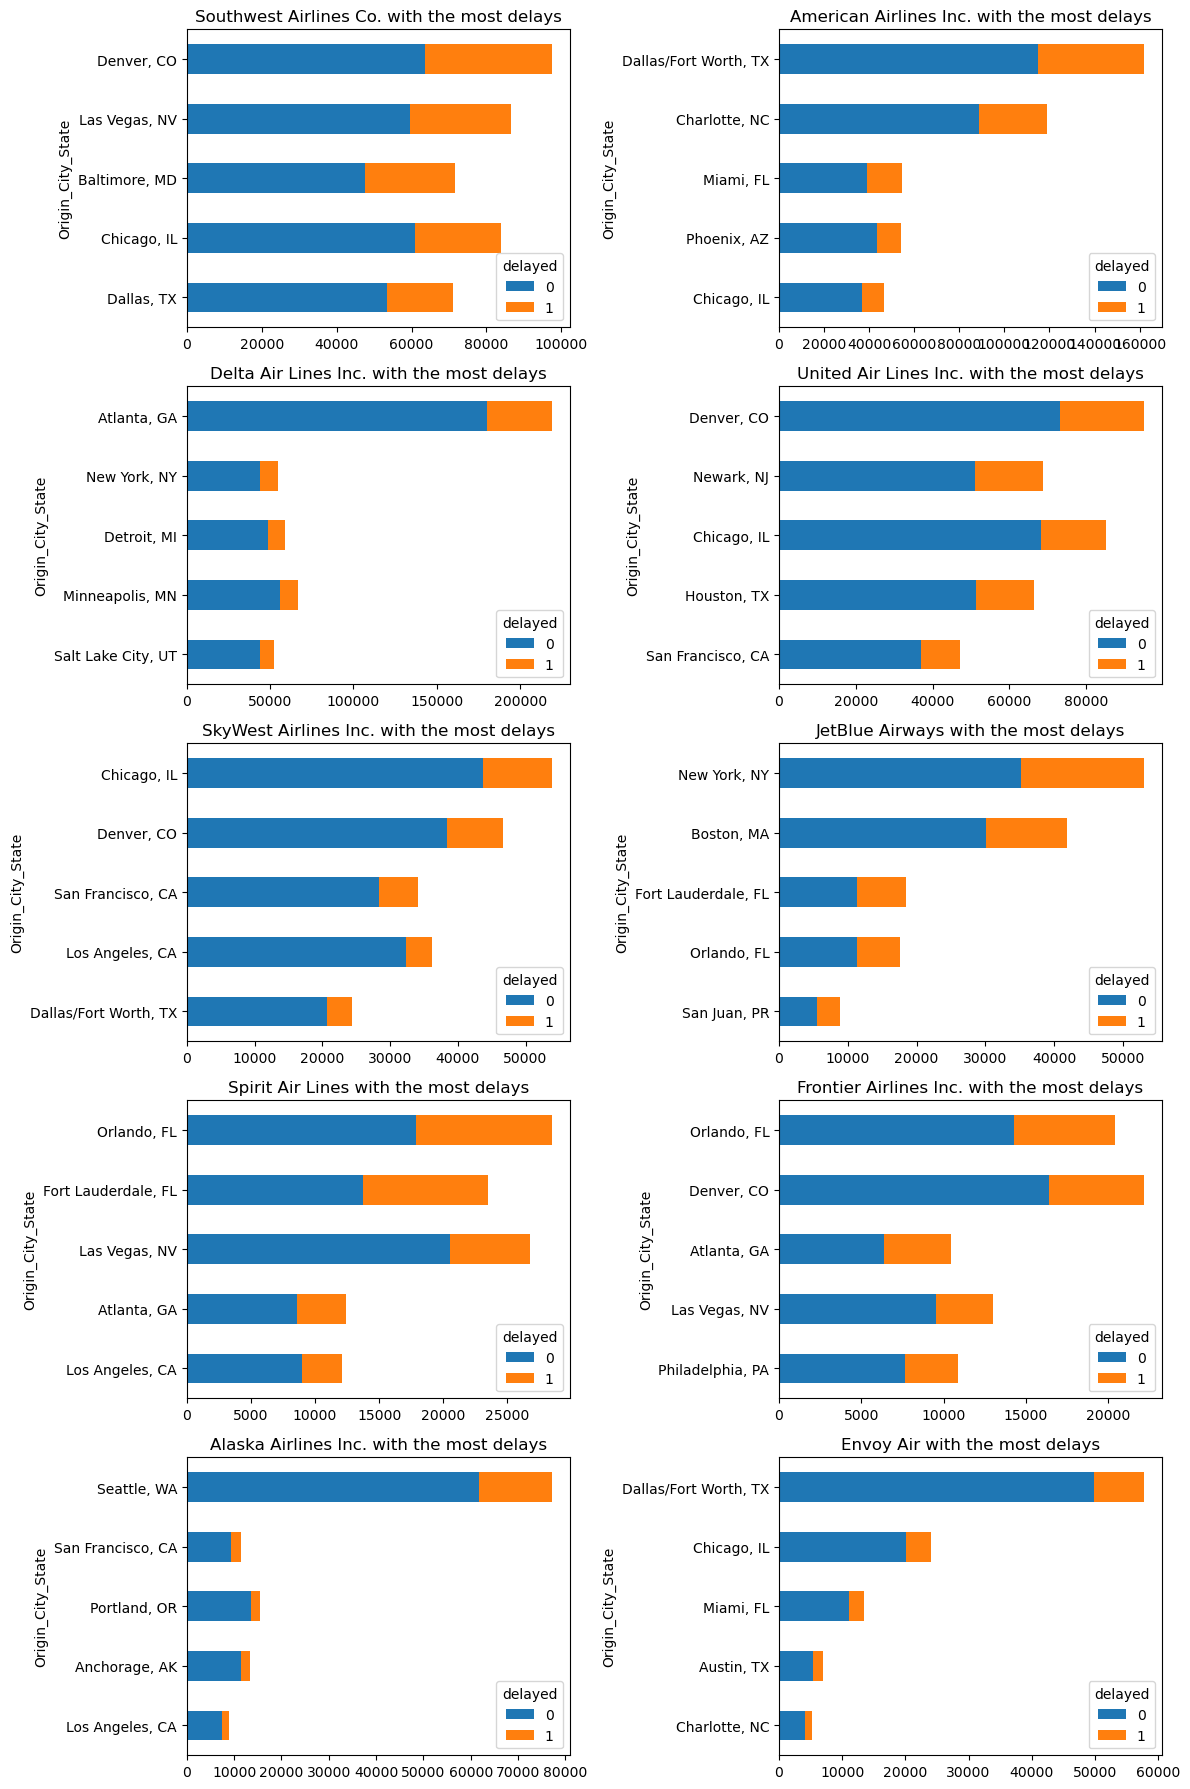

In [34]:
carrier_name = ['Southwest Airlines Co.', 'American Airlines Inc.', 'Delta Air Lines Inc.', 'United Air Lines Inc.',
                'SkyWest Airlines Inc.', 'JetBlue Airways', 'Spirit Air Lines', 'Frontier Airlines Inc.', 
                'Alaska Airlines Inc.', 'Envoy Air']

fig, axes = plt.subplots(nrows=int((len(carrier_name) - 1) / 2) + 1, ncols=2, figsize=(12, 18))

# Flatten axes in case there's only one row
axes = axes.ravel()

for i, carrier in enumerate(carrier_name):
    try:
        # Try to plot on current subplot
        df[df['Carrier_Name'] == carrier].groupby(['Origin_City_State', 'delayed']).size().unstack().sort_values(by=1, ascending=False).head(5).plot(kind='barh', stacked=True, ax=axes[i])
        axes[i].set_title(f'{carrier} with the most delays')
        axes[i].invert_yaxis()
    except IndexError:
        # If all subplots are used, break the loop
        break

# Make sure any unused axes don't have titles or labels
#for ax in axes[i:]:
#    ax.axis('off')

plt.tight_layout()
plt.show()

Now that we know the locations that have the most delays in the top 10 carriers, let us look at the top 5 carriers we previously observed to have the most influence on delayed flights

Which year and month had the most delayed flights? 

In [36]:
# View the dataframe again
df

,Carrier_Name,Week_Day,Flight_Date,Airline_DOT_ID,Tail_Number,Flight_Number,Origin_Airport_ID,Origin_City_Market_ID,Origin_IATA_Code,Origin_City_State,Destination_Airport_ID,Destination_City_Market_ID,Destination_IATA_Code,Destination_City_State,Dep_Time_Block_Group,Scheduled_Departure_Time,delayed,Scheduled_Arrival_Time,Arr_Time_Block_Group,Flight_Cancelled,Flight_Diverted,Scheduled_Gate_to_Gate_Time,Number_of_Flights,Distance_Miles,Distance_Group
0,United Air Lines Inc.,Wednesday,2023-04-26,19977,N851UA,1788,11298,30194,DFW,"Dallas/Fort Worth, TX",11618,31703,EWR,"Newark, NJ",Evening,1926,0,2359,Night,0,0,213,1,1372,6
1,United Air Lines Inc.,Wednesday,2023-04-26,19977,N37530,1787,11292,30325,DEN,"Denver, CO",13871,33316,OMA,"Omaha, NE",Evening,2051,1,2316,Night,0,0,85,1,472,2
2,United Air Lines Inc.,Wednesday,2023-04-26,19977,N78509,1786,12892,32575,LAX,"Los Angeles, CA",11042,30647,CLE,"Cleveland, OH",Night,2328,0,701,Early Morning,0,0,273,1,2052,9
3,United Air Lines Inc.,Wednesday,2023-04-26,19977,N47280,1785,10721,30721,BOS,"Boston, MA",12264,30852,IAD,"Washington, DC",Early Morning,600,0,735,Early Morning,0,0,95,1,413,2
4,United Air Lines Inc.,Wednesday,2023-04-26,19977,N826UA,1784,14747,30559,SEA,"Seattle, WA",11292,30325,DEN,"Denver, CO",Morning,1116,0,1459,Early Afternoon,0,0,163,1,1024,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6777973,Republic Airline,Friday,2024-03-29,20452,N236JQ,5646,10721,30721,BOS,"Boston, MA",11278,30852,DCA,"Washington, DC",Early Afternoon,1315,0,1507,Afternoon,0,0,112,1,399,2
6777974,Republic Airline,Friday,2024-03-29,20452,N236JQ,5646,11278,30852,DCA,"Washington, DC",10721,30721,BOS,"Boston, MA",Afternoon,1620,0,1802,Evening,0,0,102,1,399,2
6777975,Republic Airline,Friday,2024-03-29,20452,N212JQ,5647,10721,30721,BOS,"Boston, MA",11193,33105,CVG,"Cincinnati, OH",Early Afternoon,1425,0,1659,Afternoon,0,0,154,1,752,4
6777976,Republic Airline,Friday,2024-03-29,20452,N212JQ,5647,11193,33105,CVG,"Cincinnati, OH",10721,30721,BOS,"Boston, MA",Afternoon,1751,0,1958,Evening,0,0,127,1,752,4


In [254]:
# Convert 'Flight_Date' to datetime objects
df['Flight_Date'] = pd.to_datetime(df['Flight_Date'])

# Extract month and year
df['Month'] = df['Flight_Date'].dt.month
df['Year'] = df['Flight_Date'].dt.year

top_5_carriers = ['Southwest Airlines Co.', 'American Airlines Inc.', 'Delta Air Lines Inc.', 'United Air Lines Inc.',
                'SkyWest Airlines Inc.']

# Aggregate delayed flights by month and year
southwest_delayed = df[df['Carrier_Name'] == 'Southwest Airlines Co.'].groupby(['Carrier_Name', 'Year', 'Month'])['delayed'].value_counts().reset_index(name='Number of Delayed Flights')
american_delayed = df[df['Carrier_Name'] == 'American Airlines Inc.'].groupby(['Carrier_Name', 'Year', 'Month'])['delayed'].value_counts().reset_index(name='Number of Delayed Flights')
delta_delayed = df[df['Carrier_Name'] == 'Delta Air Lines Inc.'].groupby(['Carrier_Name', 'Year', 'Month'])['delayed'].value_counts().reset_index(name='Number of Delayed Flights')
united_delayed = df[df['Carrier_Name'] == 'United Air Lines Inc.'].groupby(['Carrier_Name', 'Year', 'Month'])['delayed'].value_counts().reset_index(name='Number of Delayed Flights')
skywest_delayed = df[df['Carrier_Name'] == 'SkyWest Airlines Inc.'].groupby(['Carrier_Name', 'Year', 'Month'])['delayed']..reset_index(name='Number of Delayed Flights')

In [255]:
# View one of the dataframes to see how it is structured
southwest_delayed

,Carrier_Name,Year,Month,delayed,Number of Delayed Flights
0,Southwest Airlines Co.,2023,4,0,81923
1,Southwest Airlines Co.,2023,4,1,32490
2,Southwest Airlines Co.,2023,5,0,92883
3,Southwest Airlines Co.,2023,5,1,28763
4,Southwest Airlines Co.,2023,6,0,79976
5,Southwest Airlines Co.,2023,6,1,38099
6,Southwest Airlines Co.,2023,7,0,82226
7,Southwest Airlines Co.,2023,7,1,42614
8,Southwest Airlines Co.,2023,8,0,91525
9,Southwest Airlines Co.,2023,8,1,31785


In [258]:
carriers_df= [southwest_delayed, american_delayed, delta_delayed, united_delayed, skywest_delayed]

# Create another column that combines just the year and month (i.e., Year-Month)
for i, carrier in enumerate(carriers_df): 
    carrier['Year_Month'] = carrier.Year.astype(str) + carrier.Month.astype(str)
    carrier['Year_Month'] = pd.to_datetime(carrier['Year_Month'], format="%Y%m").dt.strftime("%Y-%m")

In [260]:
carriers_df= [southwest_delayed, american_delayed, delta_delayed, united_delayed, skywest_delayed]

# Filter dataframe so that only delayed == 1 (this means a delayed flight) 
southwest_delayed = southwest_delayed[southwest_delayed['delayed'] == 1]
american_delayed = american_delayed[american_delayed['delayed'] == 1]
delta_delayed = delta_delayed[delta_delayed['delayed'] == 1]
united_delayed = united_delayed[united_delayed['delayed'] == 1]
skywest_delayed = skywest_delayed[skywest_delayed['delayed'] == 1]

In [264]:
# Check each dataframe to ensure new column is there
southwest_delayed

,Carrier_Name,Year,Month,delayed,Number of Delayed Flights,Year_Month
1,Southwest Airlines Co.,2023,4,1,32490,2023-04
3,Southwest Airlines Co.,2023,5,1,28763,2023-05
5,Southwest Airlines Co.,2023,6,1,38099,2023-06
7,Southwest Airlines Co.,2023,7,1,42614,2023-07
9,Southwest Airlines Co.,2023,8,1,31785,2023-08
11,Southwest Airlines Co.,2023,9,1,25789,2023-09
13,Southwest Airlines Co.,2023,10,1,29096,2023-10
15,Southwest Airlines Co.,2023,11,1,20937,2023-11
17,Southwest Airlines Co.,2023,12,1,26832,2023-12
19,Southwest Airlines Co.,2024,1,1,28308,2024-01


In [266]:
american_delayed

,Carrier_Name,Year,Month,delayed,Number of Delayed Flights,Year_Month
1,American Airlines Inc.,2023,4,1,18055,2023-04
3,American Airlines Inc.,2023,5,1,16651,2023-05
5,American Airlines Inc.,2023,6,1,22955,2023-06
7,American Airlines Inc.,2023,7,1,25480,2023-07
9,American Airlines Inc.,2023,8,1,21816,2023-08
11,American Airlines Inc.,2023,9,1,14994,2023-09
13,American Airlines Inc.,2023,10,1,13218,2023-10
15,American Airlines Inc.,2023,11,1,10835,2023-11
17,American Airlines Inc.,2023,12,1,12547,2023-12
19,American Airlines Inc.,2024,1,1,20540,2024-01


In [268]:
delta_delayed

,Carrier_Name,Year,Month,delayed,Number of Delayed Flights,Year_Month
1,Delta Air Lines Inc.,2023,4,1,14498,2023-04
3,Delta Air Lines Inc.,2023,5,1,11762,2023-05
5,Delta Air Lines Inc.,2023,6,1,20846,2023-06
7,Delta Air Lines Inc.,2023,7,1,22596,2023-07
9,Delta Air Lines Inc.,2023,8,1,17671,2023-08
11,Delta Air Lines Inc.,2023,9,1,11619,2023-09
13,Delta Air Lines Inc.,2023,10,1,8514,2023-10
15,Delta Air Lines Inc.,2023,11,1,7073,2023-11
17,Delta Air Lines Inc.,2023,12,1,8699,2023-12
19,Delta Air Lines Inc.,2024,1,1,13214,2024-01


In [270]:
united_delayed

,Carrier_Name,Year,Month,delayed,Number of Delayed Flights,Year_Month
1,United Air Lines Inc.,2023,4,1,12547,2023-04
3,United Air Lines Inc.,2023,5,1,12799,2023-05
5,United Air Lines Inc.,2023,6,1,17868,2023-06
7,United Air Lines Inc.,2023,7,1,20305,2023-07
9,United Air Lines Inc.,2023,8,1,12910,2023-08
11,United Air Lines Inc.,2023,9,1,10131,2023-09
13,United Air Lines Inc.,2023,10,1,8028,2023-10
15,United Air Lines Inc.,2023,11,1,6122,2023-11
17,United Air Lines Inc.,2023,12,1,7820,2023-12
19,United Air Lines Inc.,2024,1,1,11405,2024-01


In [272]:
skywest_delayed

,Carrier_Name,Year,Month,delayed,Number of Delayed Flights,Year_Month
1,SkyWest Airlines Inc.,2023,4,1,6753,2023-04
3,SkyWest Airlines Inc.,2023,5,1,6380,2023-05
5,SkyWest Airlines Inc.,2023,6,1,8434,2023-06
7,SkyWest Airlines Inc.,2023,7,1,9064,2023-07
9,SkyWest Airlines Inc.,2023,8,1,7936,2023-08
11,SkyWest Airlines Inc.,2023,9,1,8313,2023-09
13,SkyWest Airlines Inc.,2023,10,1,7305,2023-10
15,SkyWest Airlines Inc.,2023,11,1,6890,2023-11
17,SkyWest Airlines Inc.,2023,12,1,7679,2023-12
19,SkyWest Airlines Inc.,2024,1,1,11722,2024-01


In [274]:
top5_carriers = pd.concat([southwest_delayed, american_delayed, delta_delayed, united_delayed, skywest_delayed])
top5_carriers = top5_carriers.reset_index()
top5_carriers

,index,Carrier_Name,Year,Month,delayed,Number of Delayed Flights,Year_Month
0,1,Southwest Airlines Co.,2023,4,1,32490,2023-04
1,3,Southwest Airlines Co.,2023,5,1,28763,2023-05
2,5,Southwest Airlines Co.,2023,6,1,38099,2023-06
3,7,Southwest Airlines Co.,2023,7,1,42614,2023-07
4,9,Southwest Airlines Co.,2023,8,1,31785,2023-08
5,11,Southwest Airlines Co.,2023,9,1,25789,2023-09
6,13,Southwest Airlines Co.,2023,10,1,29096,2023-10
7,15,Southwest Airlines Co.,2023,11,1,20937,2023-11
8,17,Southwest Airlines Co.,2023,12,1,26832,2023-12
9,19,Southwest Airlines Co.,2024,1,1,28308,2024-01


In [276]:
# Drop unnecessary columns from new dataframe 
top5_carriers.drop(['index', 'Year', 'Month', 'delayed'], axis=1, inplace=True)

In [278]:
# Validate columns were dropped
top5_carriers

,Carrier_Name,Number of Delayed Flights,Year_Month
0,Southwest Airlines Co.,32490,2023-04
1,Southwest Airlines Co.,28763,2023-05
2,Southwest Airlines Co.,38099,2023-06
3,Southwest Airlines Co.,42614,2023-07
4,Southwest Airlines Co.,31785,2023-08
5,Southwest Airlines Co.,25789,2023-09
6,Southwest Airlines Co.,29096,2023-10
7,Southwest Airlines Co.,20937,2023-11
8,Southwest Airlines Co.,26832,2023-12
9,Southwest Airlines Co.,28308,2024-01


C:\Users\ohins\anaconda3\envs\Python3_12_2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ohins\anaconda3\envs\Python3_12_2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


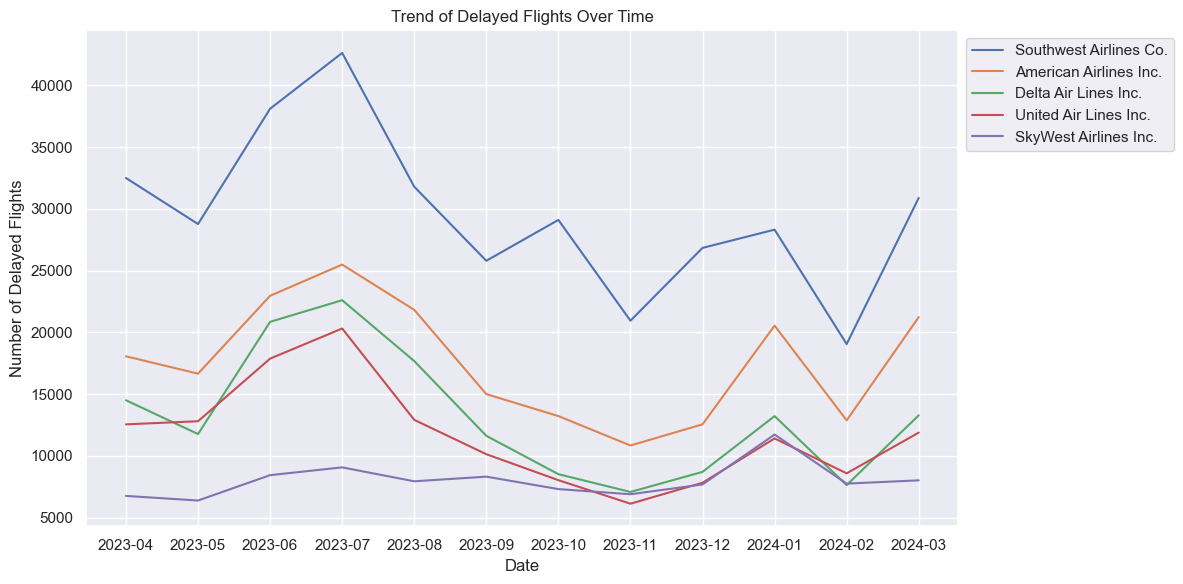

In [303]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(12, 6))  # Adjust figure size for better visualization
# Plot the responses for different events and regions
delayed_flights = sns.lineplot(data=top5_carriers, x='Year_Month', y='Number of Delayed Flights',
             hue='Carrier_Name')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Number of Delayed Flights')
plt.title('Trend of Delayed Flights Over Time')
plt.legend(loc='upper left',bbox_to_anchor=(1,1))

plt.tight_layout()
# Display the chart
plt.show()

This Timeseries analysis uncovers a few things: 
- Southwest Airlines Co. has the highest in delayed flights out of all of the top 5 carriers
- The biggest delays happened in July 2023 for Southwest Airlines and there seems to be a trend for the other airlines as well. All of the airlines had the biggest delays in July 2023 except Skywest Airlines, which had its biggest delay in January 2024.
- All the carriers had their second biggest delay in January 2024
- Southwest Airlines did peak in October 2023 while all the other airlines continued to decrease in flight delays 